In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\pbhar\\Ml_Project(end to end)\\notebook\\StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data checks to perform

- check missing values
- check duplicates
- check datatype
- check the number of unique values of each column
- check statistics of data set
- check various categories present in the different categorical column

### a) check missing values

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

In [10]:
df.duplicated().sum()

np.int64(0)

No duplicates found

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### checking number of unique columns

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insights
- all means are very close to each other
- all standard deviations are close to each other
- minimum math is zero,minimum of reading score is much other

In [15]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [19]:
print('we have {} numercal features {}:'.format(len(numeric_features),numeric_features))

we have 3 numercal features ['math score', 'reading score', 'writing score']:


In [20]:
print('we have {} categorical features {}:'.format(len(categorical_features),categorical_features))


we have 5 categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:


 ### Adding total score and average

In [24]:
df['Total score']=(df['math score']+df['reading score']+df['writing score'])
df['Average score']=df['Total score']/3

### Histogram and kde

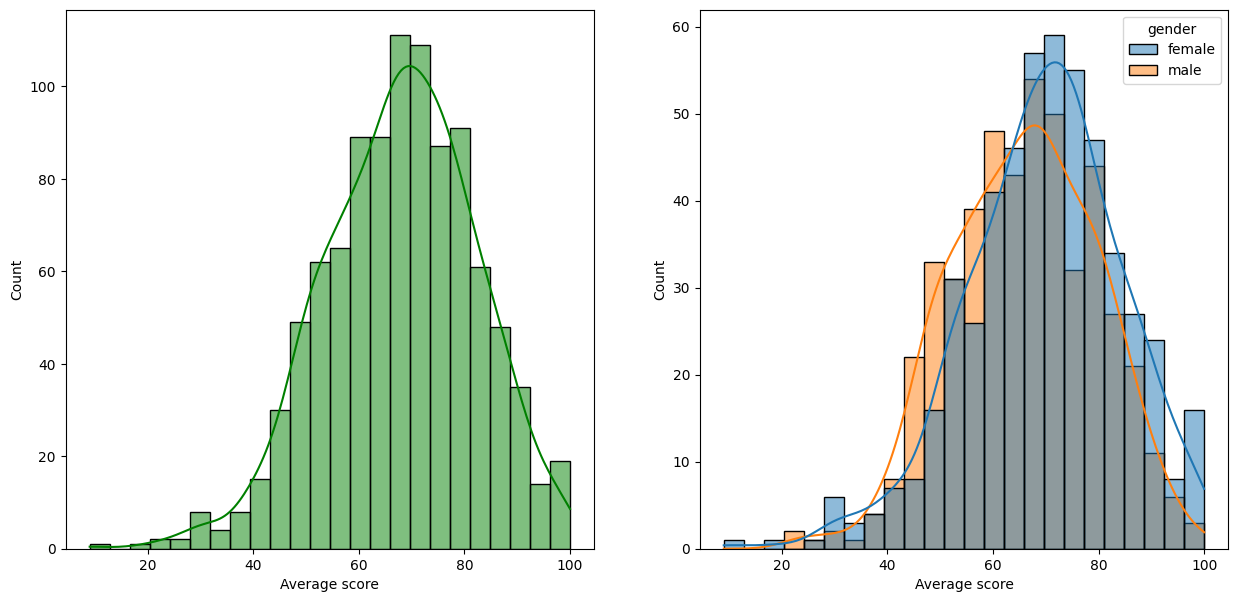

In [28]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average score',kde=True,hue='gender')
plt.show()

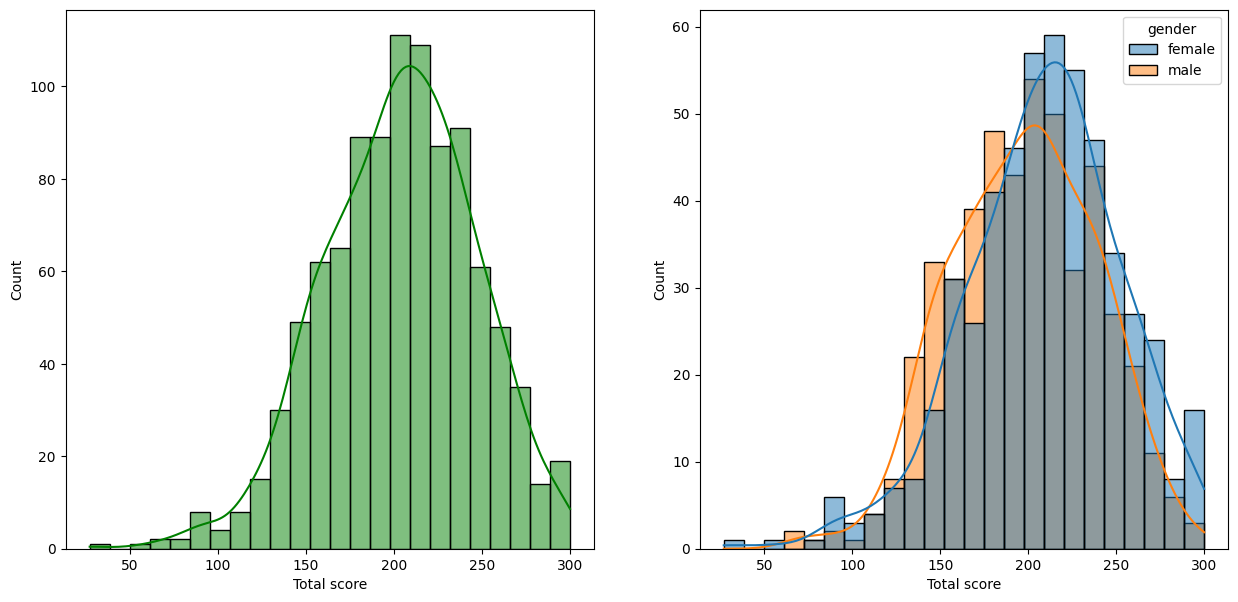

In [29]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total score',kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total score',kde=True,hue='gender')
plt.show()

### Female students are performing well than male

<Axes: xlabel='Average score', ylabel='Count'>

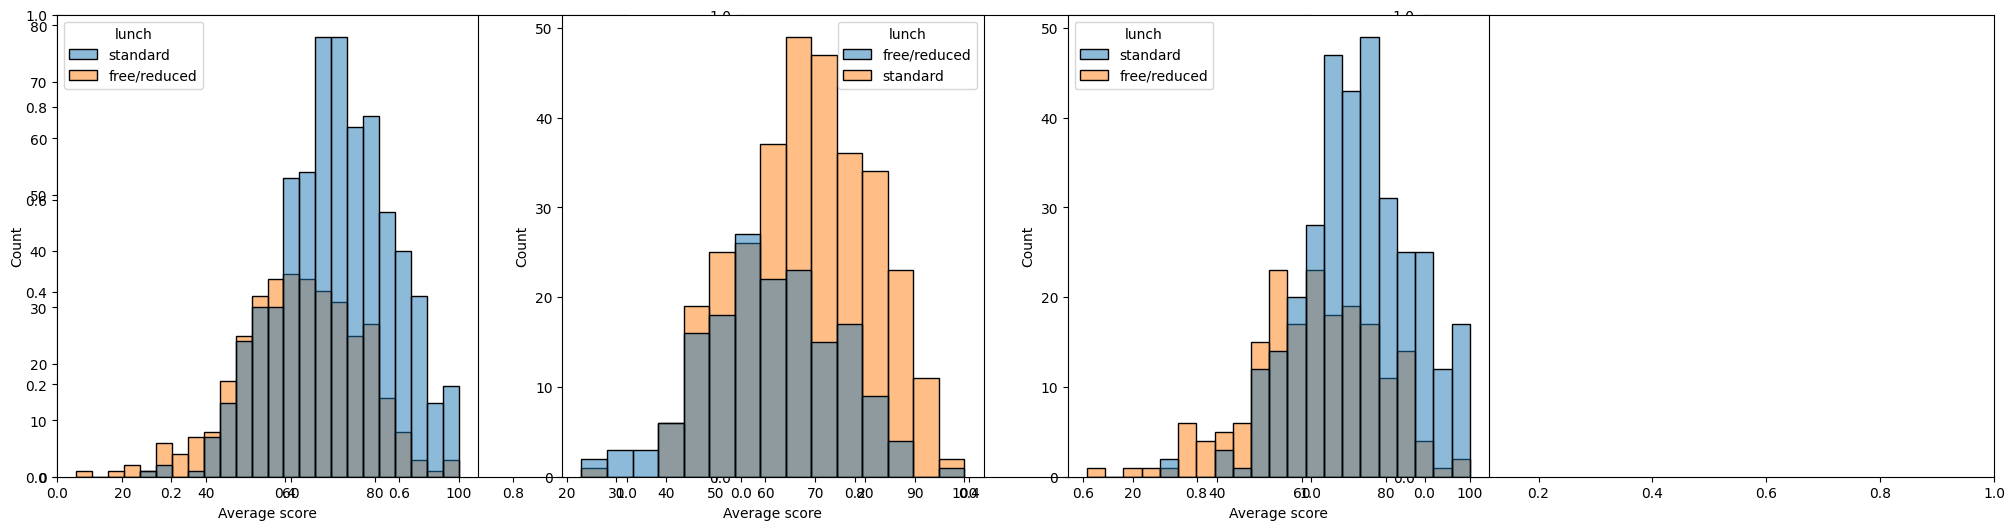

In [35]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average score',hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='Average score',hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='Average score',hue='lunch')


- standard lunch helps performs well in exams
